In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

x_task1 = np.random.rand(1000, 10)
x_task2 = np.random.rand(1000, 10)  
y_task1 = np.random.rand(1000, 1) 
y_task2 = np.random.rand(1000, 1) 
 
input_layer = Input(shape=(10,))

branch_task1 = Dense(64, activation='relu')(input_layer)
output_task1 = Dense(1, name='output_task1')(branch_task1)

branch_task2 = Dense(64, activation='relu')(input_layer)
output_task2 = Dense(1, name='output_task2')(branch_task2)

model_task1 = Model(inputs=input_layer, outputs=output_task1)
model_task2 = Model(inputs=input_layer, outputs=output_task2)

model_task1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_task2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

multitask_model = Model(inputs=input_layer, outputs=[output_task1, output_task2])

multitask_model.compile(optimizer='adam',
                        loss={'output_task1': 'mean_squared_error',
                              'output_task2': 'mean_squared_error'},
                        loss_weights={'output_task1': 0.5, 'output_task2': 0.5},
                        metrics={'output_task1': 'mae', 'output_task2': 'mae'})

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = multitask_model.fit(x_task1, [y_task1, y_task2], validation_split=0.2, epochs=50, callbacks=[early_stopping])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4165 - output_task1_mae: 0.5296 - output_task2_mae: 0.5722 - val_loss: 0.1089 - val_output_task1_mae: 0.2902 - val_output_task2_mae: 0.2601
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1097 - output_task1_mae: 0.2872 - output_task2_mae: 0.2665 - val_loss: 0.0988 - val_output_task1_mae: 0.2761 - val_output_task2_mae: 0.2519
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0976 - output_task1_mae: 0.2671 - output_task2_mae: 0.2673 - val_loss: 0.0942 - val_output_task1_mae: 0.2738 - val_output_task2_mae: 0.2469
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0974 - output_task1_mae: 0.2707 - output_task2_mae: 0.2634 - val_loss: 0.0900 - val_output_task1_mae: 0.2700 - val_output_task2_mae: 0.2427
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0918 - output_task1_mae: 0.2657 - output_task2_mae: 0.2564 - val_loss: 0.0875 - val_output_task1_mae: 0.2668 - val_output_task2_mae: 0.2407


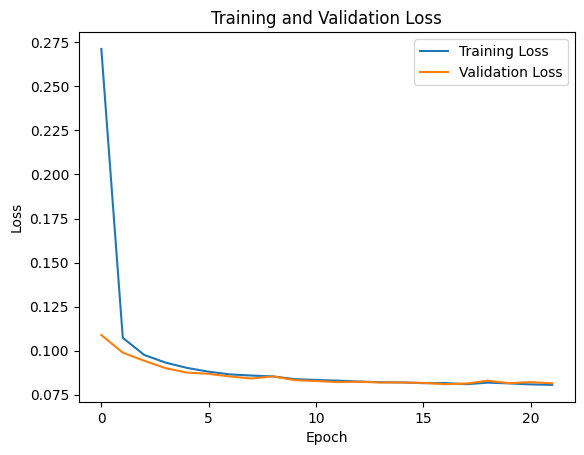

In [6]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

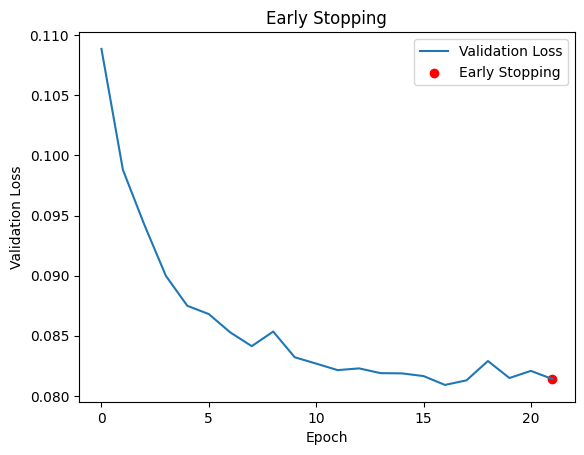

In [7]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.scatter(early_stopping.stopped_epoch, history.history['val_loss'][early_stopping.stopped_epoch], color='red', label='Early Stopping')
plt.title('Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()